In [14]:
ch = [0.35,
0.35,
0.35,
0.35,
0.35,
0.35,
0.35,
0.35,
0.35,
0.35,
0.35,
0.35,
0.35,
0.35,
0.35,
0.35,
0.35,
0.35,
0.35,
0.35,
0.35,
0.35]
print(ch)

[0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35]


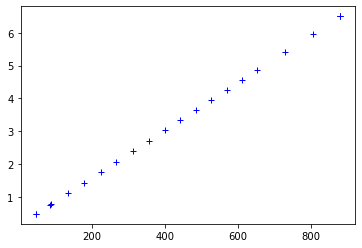

In [20]:
import numpy as np
import matplotlib.pyplot as plt
# calibration for materials

V = [88.8, 88.8, 104, 10.3, 5.72, 95.2, 85.6, 77.6, 68, 57.6, 47.6, 37, 26.6, 15.9, 5.32, 10.7, 21.4, 31.6, 42.4, 52.4, 62.4, 72.4]
E = [5.8, 0]
ch = [880.62, 880.52, 880.64, 84.53, 47.86, 806.3, 729.72, 652.29, 570.34, 486.16, 400.41, 312.37, 224.12, 134.76, 46.72, 89.56, 178.66, 267.57, 355.56, 442.22, 527.39, 610.54]
Volt_err = [0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35]

dif_V =  88.8 - 0.304
dif_E = 5.8 # MeV
m_1 = dif_E / dif_V
c_1 = m_1*0.304 * -1


#m_1 = 5.8/880.62
#y = np.array(ch)
#y = ch * k # scale with k

# relate voltage to energy
def Vin_Eout(V): # assuming the intercept is at (0,0)
    return m_1*V

# relate channel number to voltage
def Chin_Vout(ch):
    y_weights = Volt_err
    fit_parameters, fit_errors = np.polyfit(ch, V, 1, cov=True, w=y_weights)
    return fit_parameters[0]*ch + fit_parameters[1]

def function(ch):
    return Vin_Eout(Chin_Vout(ch))

x = np.array(ch)
y = function(x)
plt.plot(x,y,"b+")
plt.show()
    
    

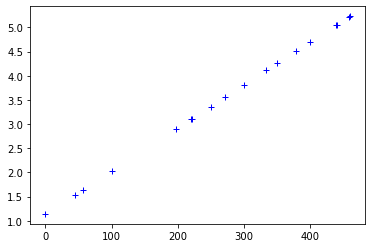

In [21]:
import numpy as np
import matplotlib.pyplot as plt
# calibration for gases

V = [42.4, 50, 64, 30.8, 7.92, 6.8, 55.6, 49.6, 42.8, 34.8, 27.4, 13.8, 64, 52.8, 46.8, 38.8, 31, 0.304]
E = [4.77, 0]
ch = [439.7, 459.8, 440.45, 220.5, 56.14, 44.45, 399.28, 350.36, 300.7, 249.5, 197.62, 100.07, 458.83, 378.18, 333.96, 271.38, 221.4, 0]
Volt_err = [3, 3, 1, 1, 1, 0.4, 1, 1, 1, 0.5, 0.5, 0.4, 1, 1, 1, 1, 1, 0.2]

dif_V =  0.5*(42.4+50) - 0.304
dif_E = 4.77 # MeV
m_1 = dif_E / dif_V
c_1 = m_1*0.304 * -1


# relate voltage to energy
def Vin_Eout(V):
    return m_1*V + c_1

# relate channel number to voltage
def Chin_Vout(ch):
    y_weights = Volt_err
    fit_parameters, fit_errors = np.polyfit(ch, V, 1, cov=True, w=y_weights)
    return fit_parameters[0]*ch + fit_parameters[1]

def function(ch):
    return Vin_Eout(Chin_Vout(ch))

x = np.array(ch)
y = function(x)
plt.plot(x,y,"b+")
plt.show()